In [1]:
import pandas as pd
import numpy as np

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

%matplotlib inline 
matplotlib.style.use('ggplot') # tema visualisasi kayak di R

# Import Dataset

In [2]:
data = pd.read_csv('train.csv')

# Soal Pertama

In [7]:
sale_price = data['SalePrice']
sale_price.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [18]:
# ukuran pemusatan
sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [25]:
print("Nilai Modus:", sale_price.mode()[0])

Nilai Modus: 140000


In [16]:
# ukuran penyebaran
print('Nilai Variansi:',sale_price.var())
print('Nilai Standar Deviasi:',sale_price.std())
print('Nilai Variansi:',sale_price.quantile(0.75)-sale_price.quantile(0.25))

Nilai Variansi: 6311111264.297448
Nilai Standar Deviasi: 79442.50288288662
Nilai Variansi: 84025.0


In [28]:
# IQR = sale_price.quantile(0.75)-sale_price.quantile(0.25)
# print("max Toleransi:", sale_price.quantile(0.75) + 1.5*IQR)

max Toleransi: 340037.5


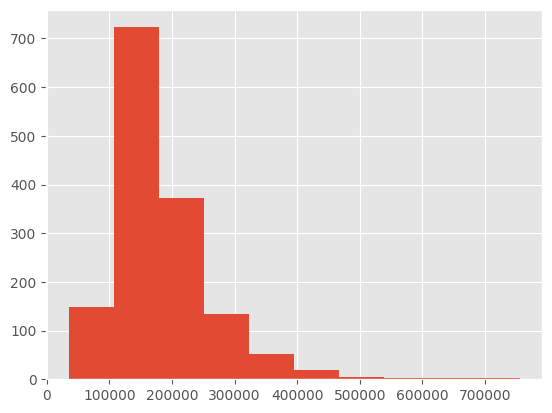

In [48]:
plt.hist(sale_price)
plt.show()

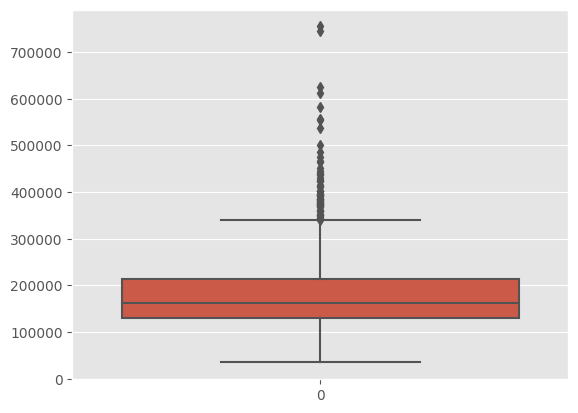

In [26]:
sns.boxplot(data = sale_price)
plt.show()

In [ ]:
'''
Interpretasi
1. Data ini memiliki distribusi skew positif
2. Harga tanah yang sering muncul dilihat dari histogram adalah pada range 100rb - 200rb hal ini dibuktikan dengan nilai modus 140rb
3. Dengan melihat nilai std yang cukup besar maka bisa diperkirakan data tersebar cukup baik hal ini dibuktikan melalui plot dan nilai max min
'''

# Soal Kedua

In [3]:
data_2006 = data[data['YrSold']==2006]['SalePrice']
data_2007 = data[data['YrSold']==2007]['SalePrice']
data_2008 = data[data['YrSold']==2008]['SalePrice']
data_2009 = data[data['YrSold']==2009]['SalePrice']
data_2010 = data[data['YrSold']==2010]['SalePrice']
data_2006.describe()

count       314.000000
mean     182549.458599
std       79426.838855
min       35311.000000
25%      131375.000000
50%      163995.000000
75%      218782.500000
max      625000.000000
Name: SalePrice, dtype: float64

# Soal Ketiga

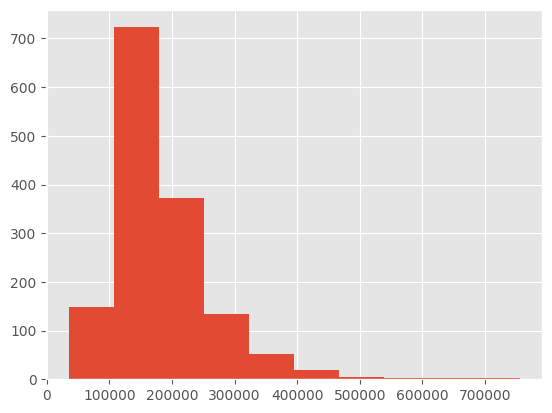

In [47]:
plt.hist(sale_price)
plt.show()

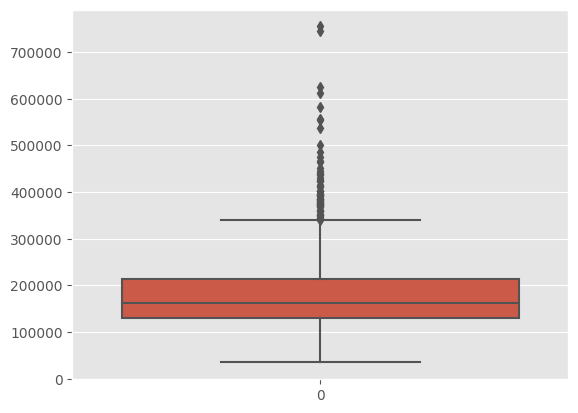

In [50]:
sns.boxplot(data = sale_price)
plt.show()

In [49]:
sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
'''
Analisa
1. Dilihat dari plot histogram, median maupun mean tidak bisa digunakan untuk analisis. Hal ini karena kedua nilai tersebut tidak bisa mewakili sample yang dipakai
2. Dari Box Plot yang tertera, apabila kita menggunakan mean maupun median tersebut maka akan banyak nilai outlier yang tidak terwakilkan

Interpretasi
1. Meskipun data tersebar cukup baik namun data masih belum berdistribusi normal (perlu dilakukan proses transformasi data agar berdist normal).
2. Data yang belum di transformasi akan beresiko memiliki banyak outlier hal ini dibuktikan oleh BoxPlot yang tertera
'''

# Soal Keempat

H0 = miu2006 = miu2007 = miu2008 = miu2009 = miu2010

H1 = at least ada 2 yang berbeda

In [4]:
data.groupby(['YrSold'])['SalePrice'].mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [5]:
anova = st.f_oneway(data_2006, data_2007, data_2008, data_2009, data_2010)

In [6]:
pvalue = anova.pvalue
print(pvalue)
if pvalue >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

0.6300887663573457
Insufficient Reject H0


In [ ]:
'''
Kesimpulan dan Interpretasi
1. P value > dari alpha (0.05)
2. H0 diterima
3. Tahun penjualan tidak mempengaruhi harga rumah
'''`

# Soal Advanced

In [16]:
data_bank = pd.read_csv('bank-full.csv', sep=";")
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
# H0 : Rata rata campaign buka akun baru sama dengan rata rata campaign tidak buka akun baru
# H1 : Rata rata campaign buka akun baru tidak sama dengan rata rata campaign tidak buka akun baru

In [19]:
open_account = data_bank[data_bank['y']=='yes']['campaign']
no_account = data_bank[data_bank['y']=='no']['campaign']

In [20]:
open_account.mean()

2.1410474569861977

In [21]:
no_account.mean()

2.8463503832473322

In [22]:
ttest = st.ttest_ind(a = open_account, b=no_account)
p_value = ttest.pvalue

# langkah 4
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa rata-rata pembukaan account sama dengan rata rata tidak buka account')
else:
    print('Cukup bukti menyatakan bahwa rata-rata buka account berbeda dari tidak buka account')

P-Value : 1.0123473642096295e-54
Cukup bukti menyatakan bahwa rata-rata buka account berbeda dari tidak buka account


In [ ]:
'''
Interpretasi

Rata rata kedua populasi yang berbeda menunjukkan bahwa terdapat pengaruh campaign yang cukup signifikan untuk keputusan nasabah buka akun atau tidak
'''